<a href="https://colab.research.google.com/github/nikita280187/fraud-detection-credit-card/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# fraud detection are:
"Enormous data is processed every day and the model build must be fast enough to respond to the scam in time.
Imbalanced data i.e most of the transactions (99.8%) are not fraudulent which makes it really hard for detecting the fraudulent ones
data availability as the data is mostly private.
Misclassified data can be another major issue, as not every fraudulent transaction is caught and reported.
Adaptive techniques used against the model by the scammers".

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [9]:
df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,53571.000000,53571.000000,53571.000000,53571.000000,53571.000000,53571.000000,53571.000000,53571.000000,53571.000000,53571.000000,...,53571.000000,53571.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000
mean,30004.864404,-0.243182,0.000586,0.691588,0.179664,-0.257872,0.102917,-0.119311,0.052872,0.094530,...,-0.028932,-0.106714,-0.039090,0.007830,0.135096,0.020158,0.003957,0.003972,94.260870,0.002856
std,13302.545313,1.879598,1.639428,1.483708,1.393856,1.411097,1.313136,1.271570,1.214929,1.201748,...,0.731807,0.636939,0.593273,0.596080,0.438590,0.500092,0.388427,0.329538,252.290845,0.053366
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,23663.500000,-0.994263,-0.573628,0.212411,-0.724005,-0.873897,-0.636806,-0.606014,-0.147112,-0.630279,...,-0.230582,-0.528974,-0.179410,-0.322721,-0.128328,-0.330573,-0.063648,-0.006589,7.680000,0.000000
50%,34251.000000,-0.249472,0.078153,0.790661,0.189575,-0.290113,-0.152437,-0.075304,0.058859,-0.012999,...,-0.066124,-0.082370,-0.051736,0.062416,0.174351,-0.073699,0.008850,0.022405,25.495000,0.000000
75%,40127.000000,1.154647,0.732455,1.424778,1.061933,0.281788,0.493733,0.425496,0.333521,0.780864,...,0.110098,0.307953,0.079102,0.401967,0.421204,0.298577,0.083071,0.076498,86.867500,0.000000
max,46050.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [11]:
df.shape

(53571, 31)

In [12]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [13]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [30]:
df = df.dropna(how='any',axis=0)

In [31]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0028642566973061012
Fraud Cases: 153
Valid Transactions: 53417


#Fraud Transactions

In [32]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     153.000000
mean       97.616013
std       230.026856
min         0.000000
25%         1.000000
50%         7.610000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

#Valid Transactions

In [33]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    53417.000000
mean        94.251260
std        252.353693
min          0.000000
25%          7.680000
50%         25.520000
75%         86.650000
max      12910.930000
Name: Amount, dtype: float64

#Correlation Matrix

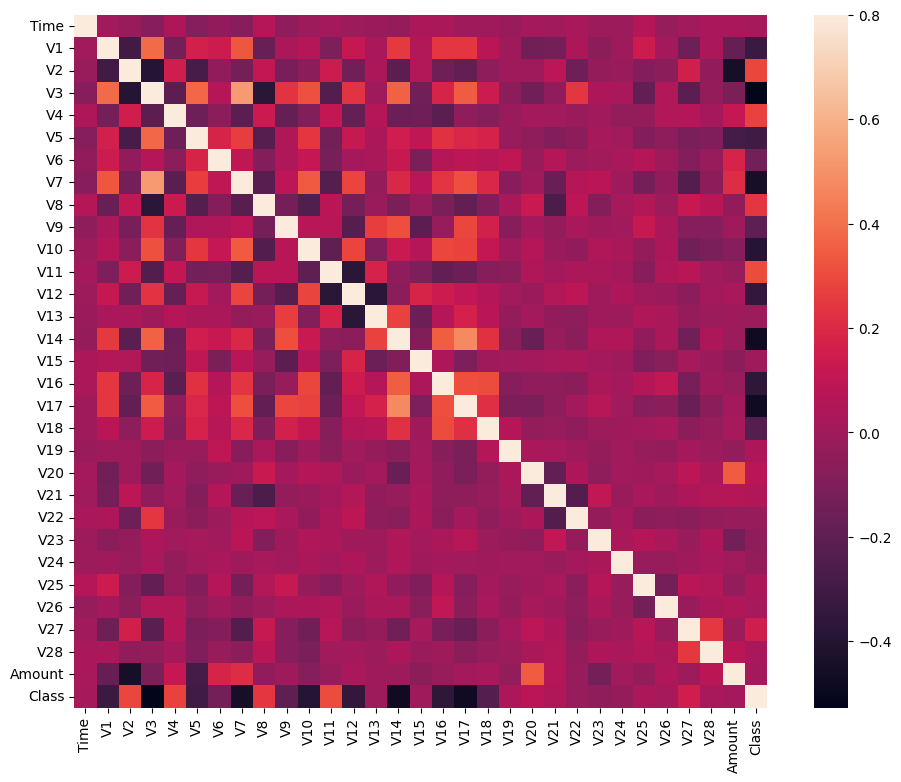

In [18]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [34]:
X = df.drop(['Class'], axis = 1)
Y = df["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xdf = X.values
ydf = Y.values

(53570, 30)
(53570,)


In [37]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(xdf, ydf, test_size = 0.2, random_state = 42)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

In [38]:
for model in models:
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    print(f"{model} :- \t Accuracy = {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() :- 	 Accuracy = 1.00
GaussianNB() :- 	 Accuracy = 0.99
DecisionTreeClassifier() :- 	 Accuracy = 1.00
RandomForestClassifier() :- 	 Accuracy = 1.00
KNeighborsClassifier() :- 	 Accuracy = 1.00


#Evaluating Parameters

In [40]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (ypred != ytest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(ytest, ypred)
print("The accuracy is {}".format(acc))

prec = precision_score(ytest, ypred)
print("The precision is {}".format(prec))

rec = recall_score(ytest, ypred)
print("The recall is {}".format(rec))

f1 = f1_score(ytest, ypred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(ytest, ypred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9968265820421878
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Confusion Matrix

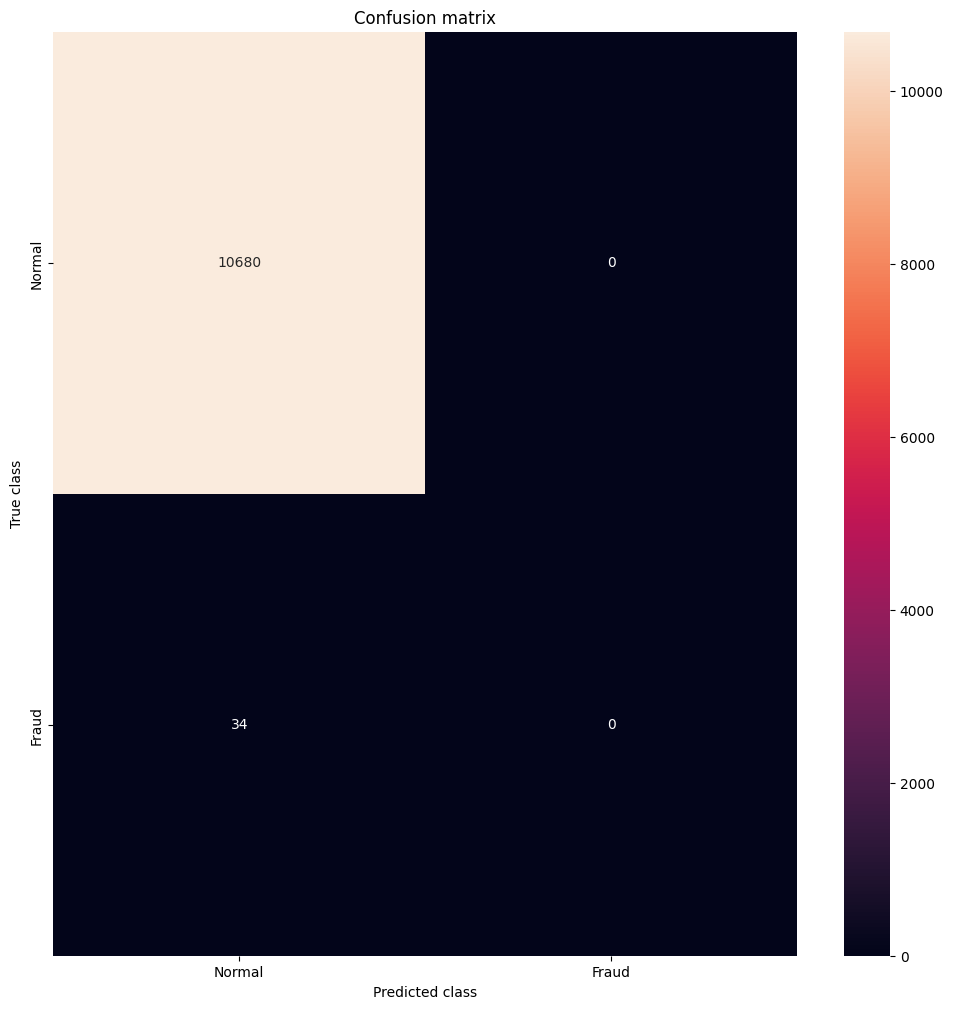

In [43]:
LABELS = ['Normal', 'Fraud']
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize =(12, 12))
sns.heatmap(cm, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#Training Accuracy

In [45]:
cm = confusion_matrix(ytest, ypred)
cm

array([[10680,     0],
       [   34,     0]])

In [48]:
y_pred_training = model.predict(xtrain)

In [50]:
cm = confusion_matrix(y_pred_training, ytrain)
cm

array([[42737,   101],
       [    0,    18]])

[]

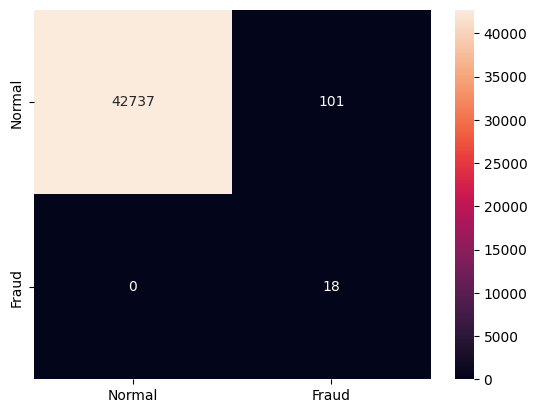

In [52]:
sns.heatmap(cm, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d").plot()

In [51]:
print(classification_report(ytrain, y_pred_training))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42737
         1.0       1.00      0.15      0.26       119

    accuracy                           1.00     42856
   macro avg       1.00      0.58      0.63     42856
weighted avg       1.00      1.00      1.00     42856



*#As you can see with our Random Forest Model we are getting a better result even for the recall which is the most tricky part.*

"The model used must be simple and fast enough to detect the anomaly and classify it as a fraudulent transaction as quickly as possible.
Imbalance can be dealt with by properly using some methods which we will talk about in the next paragraph
For protecting the privacy of the user the dimensionality of the data can be reduced.
A more trustworthy source must be taken which double-check the data, at least for training the model.
We can make the model simple and interpretable so that when the scammer adapts to it with just some tweaks we can have a new model up and running to deploy".